In [1]:
import sys
sys.path.append('..')
import pandas as pd

## 1.- [dabl](https://amueller.github.io/dabl/dev/index.html)
dabl ha sido creado por Andreas Mueller e intenta ayudar a que el aprendizaje automático supervisado sea más accesible para los principiantes y reducir la placa de caldera para tareas comunes. Dabl se inspira en scikit-learn y auto-sklearn. Consulte el sitio web oficial para obtener más información.

In [2]:
import dabl

c:\Users\daniel\Desktop\practica\NLP_with_Disaster_Tweets\nlpenv\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
train = pd.read_csv('../data/train.csv')
train.shape

(7613, 5)

In [4]:
train_clean = dabl.clean(train, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    0
categorical     1
date            0
free_string     3
useless         0
dtype: int64


In [5]:
types = dabl.detect_types(train_clean)
print(types) 

          continuous  dirty_float  low_card_int  categorical   date  \
id              True        False         False        False  False   
keyword        False        False         False        False  False   
location       False        False         False        False  False   
text           False        False         False        False  False   
target         False        False         False         True  False   

          free_string  useless  
id              False    False  
keyword          True    False  
location         True    False  
text             True    False  
target          False    False  


Target looks like classification


[[<Figure size 216x216 with 2 Axes>], None]

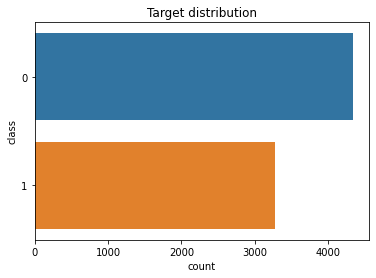

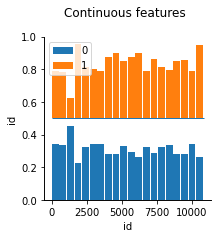

In [6]:
dabl.plot(train, target_col="target")

In [7]:
ec = dabl.SimpleClassifier(random_state=0).fit(train, target_col="target") 

Running DummyClassifier()
accuracy: 0.570 average_precision: 0.430 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.363
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.570 average_precision: 0.430 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.363

Running GaussianNB()
accuracy: 0.570 average_precision: 0.465 roc_auc: 0.536 recall_macro: 0.500 f1_macro: 0.363
Running MultinomialNB()
accuracy: 0.570 average_precision: 0.430 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.363
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.488 average_precision: 0.450 roc_auc: 0.539 recall_macro: 0.539 f1_macro: 0.441
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.488 average_precision: 0.450 roc_auc: 0.539 recall_macro: 0.539 f1_macro: 0.441

Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.534 average_precision: 0.506 roc_auc: 0.590 recall_macro: 0.554 f1_macro: 0.

## 2.- [missingno](https://github.com/ResidentMario/missingno)
Los datos en la vida real son desordenados y faltantes, no nos ayuda a lidiar con los valores faltantes en un conjunto de datos con la ayuda de visualizaciones. Con más de 2k estrellas en github, esta biblioteca ya es muy popular.

In [8]:
import missingno as msno

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<AxesSubplot:>

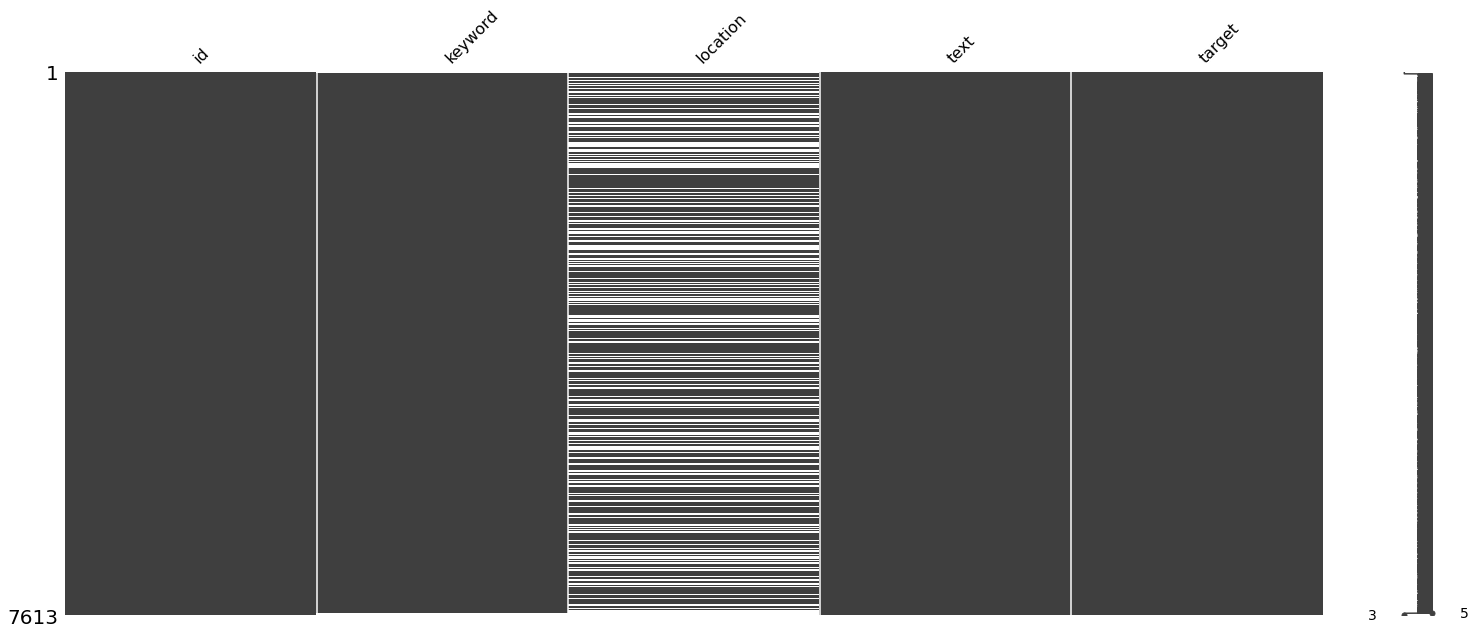

In [10]:
msno.matrix(train)

In [11]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

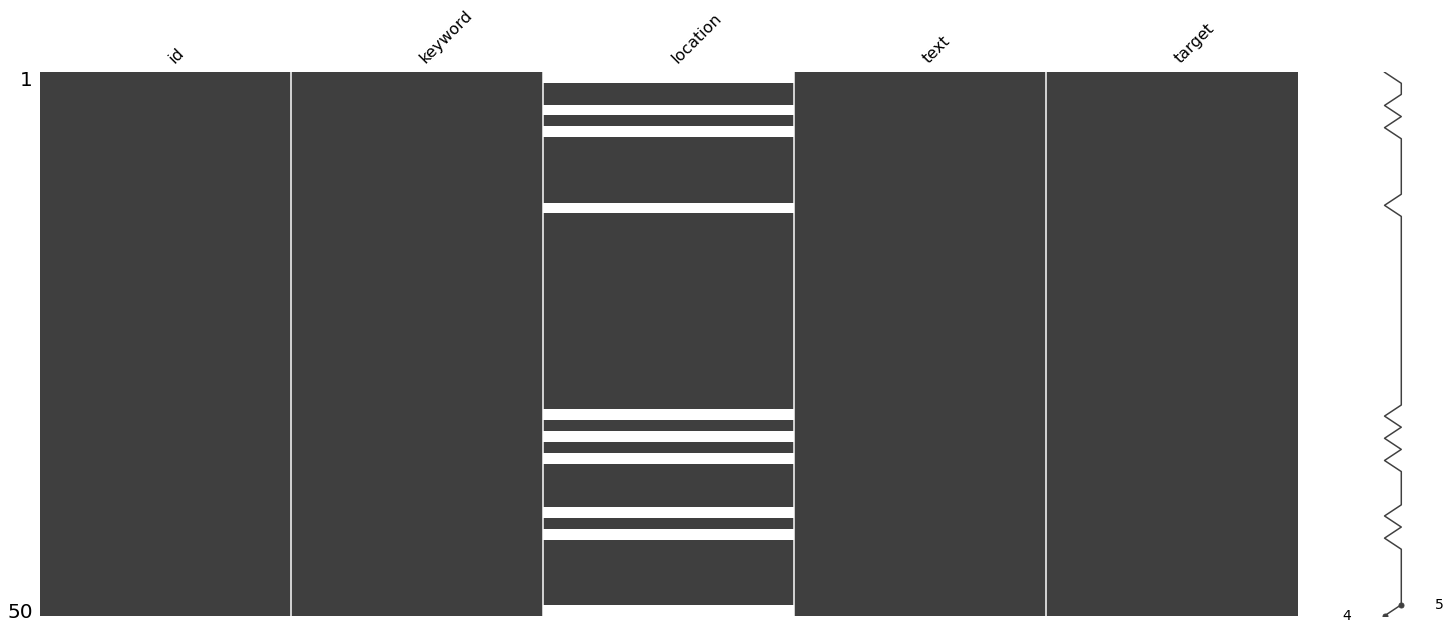

In [12]:
msno.matrix(train.sample(50))

<AxesSubplot:>

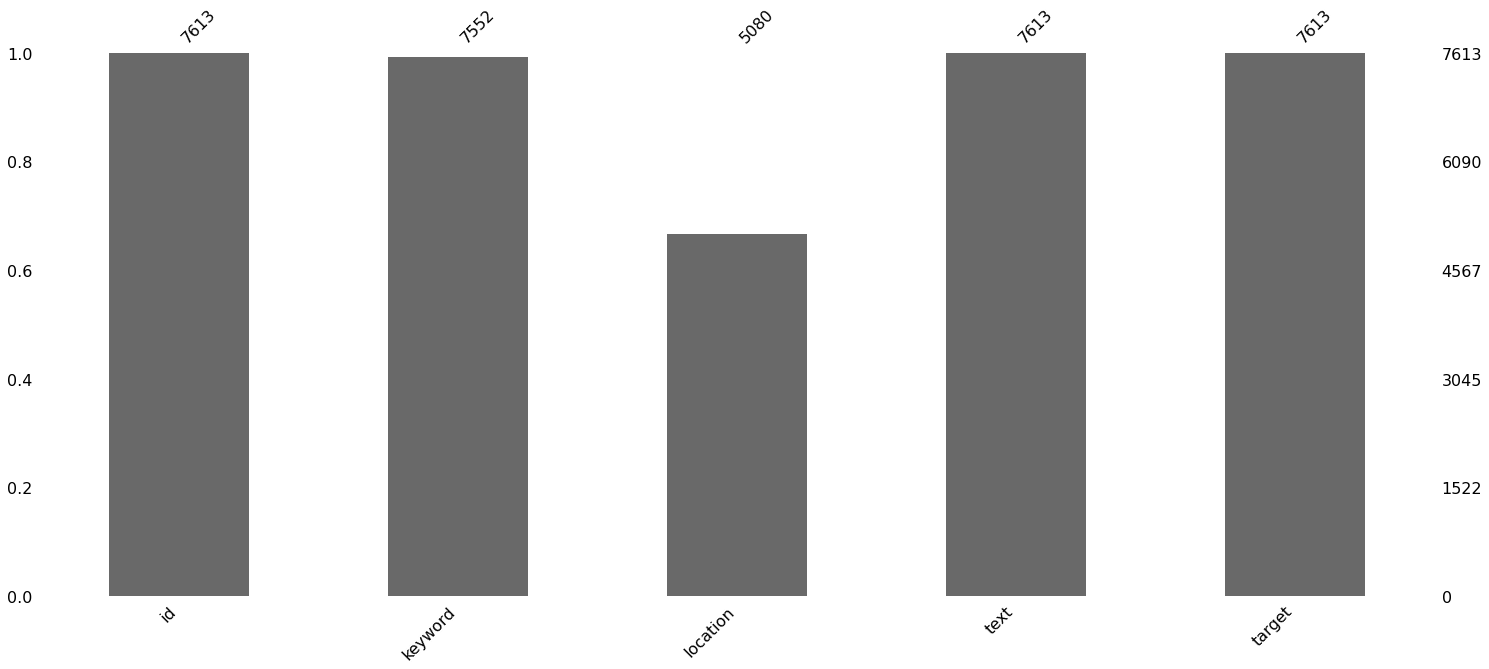

In [13]:
msno.bar(train)

<AxesSubplot:>

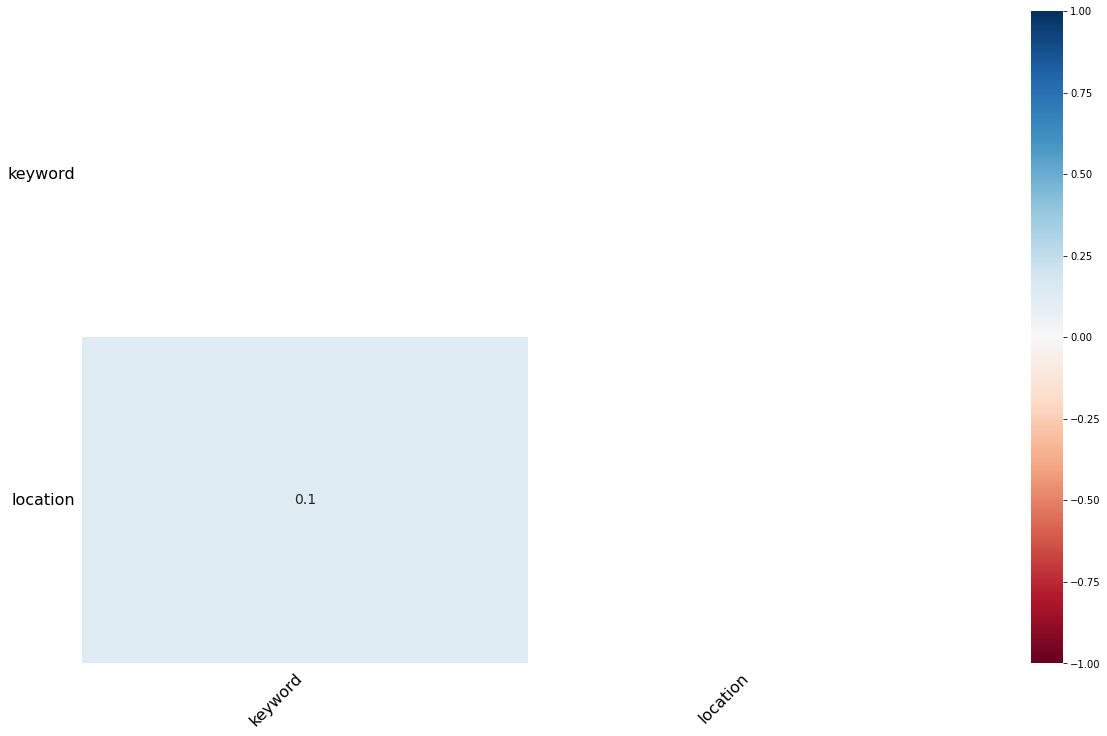

In [14]:
msno.heatmap(train)

## 3.- [Emot](https://github.com/NeelShah18/emot)
Emot es un paquete de detección de emojis y emoticonos para Python. Puede resultar muy útil cuando tenemos que preprocesar nuestros datos de texto para deshacernos de los emoticonos.

## 4.- [Flashtext](https://github.com/vi3k6i5/flashtext)
Flastext le permite extraer palabras clave de una oración o reemplazar palabras clave en oraciones. Se basa en el algoritmo FlashText y es considerablemente más rápido que las expresiones regulares para tareas de NLP.

In [15]:
from flashtext import KeywordProcessor

El conjunto de datos es de la competencia: [Real or Not? NLP with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started) donde nuestro trabajo es crear un modelo ML para predecir si los tweets del conjunto de prueba pertenecen a un desastre o no, en forma de 1 o 0.Este es un caso clásico de un problema de clasificación binaria.

In [16]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
corpus = ', '.join(train['text'])
corpus[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, Forest fire near La Ronge Sask. Canada, All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected, 13,000 people receive #wildfires evacuation orders in California , Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school , #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires, #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas, I'm on top of the hill and I can see a fire in the woods..., There's an emergency evacuation happening now in the building across the street, I'm afraid that the tornado is coming to our area..., Three people died from the heat wave so far, Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding, #raining #flood

### 4.1 Extract Keywords or searching for words in a corpus

In [20]:
# How many times does the word 'flood' appear in the corpus?
processor = KeywordProcessor()
processor.add_keyword('flood')
found = processor.extract_keywords(corpus)
print(len(found))

58


In [21]:
# Replacing all occurences of word 'forest fire'(case insensitive) with fire
processor = KeywordProcessor(case_sensitive = False)
processor.add_keyword('forest fire','fire')
found = processor.replace_keywords(corpus)
print(found[:100])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, fire near La Ronge Sask. Cana


La palabra Forest Fire se reemplaza con solo fire. De la misma manera también podríamos reemplazar caracteres especiales, hipervínculos, etc. de un documento.

## 5.- [PyFlux](https://pyflux.readthedocs.io/en/latest/getting_started.html)
El análisis de series de tiempo es uno de los problemas más frecuentes en el dominio del aprendizaje automático. PyFlux es una biblioteca de código abierto en Python creada explícitamente para trabajar con problemas de series de tiempo. La biblioteca tiene una excelente variedad de modelos modernos de series de tiempo que incluyen, entre otros, los modelos ARIMA, GARCH y VAR. En resumen, PyFlux ofrece un enfoque probabilístico para el modelado de series de tiempo. Vale la pena intentarlo.

 Para ver cómo funciona esta biblioteca, usaré el conjunto de datos [NIFTY-50 Stock Market Data (2000-2019)](https://www.kaggle.com/rohanrao/nifty50-stock-market-data). Los datos son el historial de precios y los volúmenes de negociación de las cincuenta acciones en el índice NIFTY 50 de NSE (National Stock Exchange) India. Usemos solo acciones de una sola empresa.

In [ ]:
import pyflux as pf

Para ver mas [aqui](https://www.kaggle.com/parulpandey/useful-python-libraries-for-data-science)

## 6.- [Bamboolib](https://bamboolib.8080labs.com/)
bamboolib es una GUI para la exploración y transformación de datos en Python Pandas. Es compatible con Jupyter Notebook y JupyterLab. Bamboolib es una biblioteca de código cerrado, pero se puede usar de forma gratuita para datos abiertos a través de Binder o Kaggle. Para obtener más información sobre Bamboolib, visite su sitio web oficial.